<a href="https://colab.research.google.com/github/Charcape20/preprocesamiento_datos_perdidos/blob/main/preprocesamiento_datos_perdidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pregunta 1**

Los datos están en el siguiente link: 

https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/people.csv

Importa los datos con **pandas.read_csv**

In [ ]:
# Librerias
import pandas as pd
import missingno as ms 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando datos
df = pd.read_csv("https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/people.csv")
df.head()

,SEXO,UNIVERSIDAD,PERFIL,CARRERA,POSICION,ESPECIALIZACION_DATA SCIENCE,DIA_PREFERIDO
0,F,ULIMA,JOVEN,ADMINISTRACION,ANALISTA,NO,SABADO
1,M,OTROS,ADULTO,ADMINISTRACION,NaN,NO,VIERNES
2,M,OTROS,ADULTO,ADMINISTRACION,OTROS,NO,VIERNES
3,M,OTROS,ADULTO,ADMINISTRACION,OTROS,NO,VIERNES
4,F,SAN MARCOS,JOVEN,CIENCIAS PURAS,ESTUDIANTE,NO,SABADO


Ahora **verifica** si existen datos perdidos (vacíos) utilizando la librería **missingno**

In [ ]:
# Realizando suma para verificar si existen datos vacios en cada campo
# Podemos observar que existen 32 datos Perdidos en los campos de Universidad, 29 en Perfil, 35 en Carrera y 34 en Posición 
df.isnull().sum()

#Visualizar gráfica de Valores Nulos (Observamos que corresponde con lo mencionado anteriormente)
#ms.matrix(df)


SEXO                             0
UNIVERSIDAD                     32
PERFIL                          29
CARRERA                         35
POSICION                        34
ESPECIALIZACION_DATA SCIENCE     0
DIA_PREFERIDO                    0
dtype: int64

# **Pregunta 2**

Podemos **reemplazar** los datos perdidos utilizando el método **fillna**.

Reemplaza los vacíos con la **moda** de la columna correspondiente.

No te olvides de agregar **inplace=True** para que los cambios permanezcan.

In [ ]:
# Remplazando valores perdidos con la Moda de las columnas correspondientes debido a las variables categóricas
df['UNIVERSIDAD'].fillna(df['UNIVERSIDAD'].mode()[0], inplace=True)
df['PERFIL'].fillna(df['PERFIL'].mode()[0], inplace=True)
df['CARRERA'].fillna(df['CARRERA'].mode()[0], inplace=True)
df['POSICION'].fillna(df['POSICION'].mode()[0], inplace=True)

# Verificar Nuevamente cuantos datos perdidos tenemos
df.isnull().sum()

SEXO                            0
UNIVERSIDAD                     0
PERFIL                          0
CARRERA                         0
POSICION                        0
ESPECIALIZACION_DATA SCIENCE    0
DIA_PREFERIDO                   0
dtype: int64

# **Pregunta 3**

Podemos **filtrar** los datos utilizamos el método **loc**.

Filtra los datos para visualizar **solamente** las filas donde **CARRERA** sea **ADMINISTRACION** o **MEDICINA**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


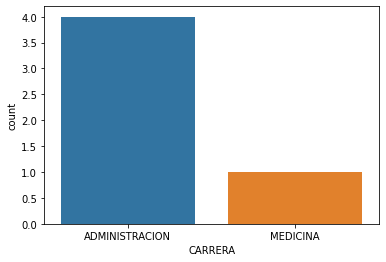

In [ ]:
# Agregar condiciones en la funcion loc y almacenar resultado en otro dataframe y visualizar resultado
condicion = (df['CARRERA'] == 'ADMINISTRACION') | (df['CARRERA'] == 'MEDICINA' )
df2 = df.loc[condicion]
df2
sns.countplot(df2['CARRERA'])



# **Pregunta 4**

Podemos **visualizar** si alguna variable **influye** para afirmar que la persona **cuenta con una especialización de Data Science**

Utiliza la librería **seaborn** y el método **countplot** para evaluar las siguientes variables:
1. SEXO
2. PERFIL

No te olvides agregar **hue="ESPECIALIZACION_DATA SCIENCE"** para obtener una leyenda en el gráfico que distinga si cuenta o no con la especialización.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


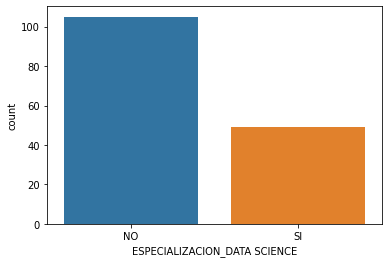

In [ ]:
# Observamos que tenemos data desbalanceada con una diferencia mayor a 30%
# En caso entrenemos un modelo, se deben aplicar técnicas para balancear nuestra data
sns.countplot(df['ESPECIALIZACION_DATA SCIENCE'])

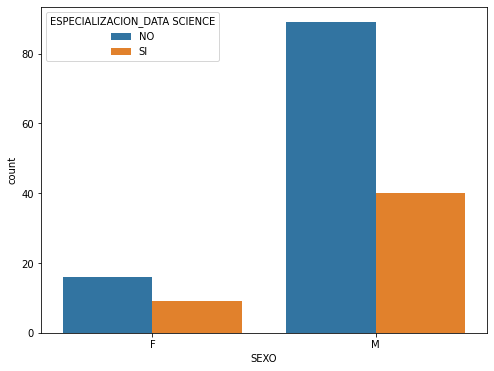

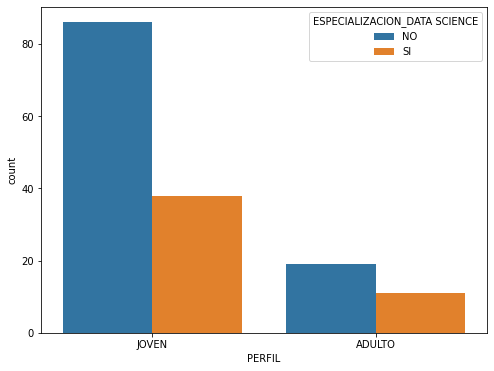

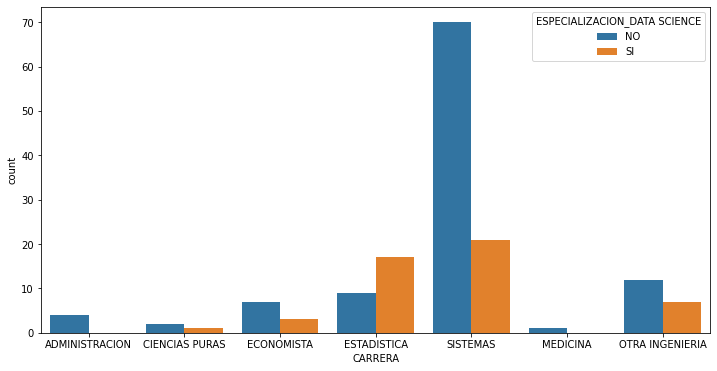

In [ ]:
# Comprobando cuanto influye el SEXO  en la ESPECIALIZACION DE DATA SCIENCE
plt.figure(figsize=(8,6))
sns.countplot(x='SEXO',data = df,hue='ESPECIALIZACION_DATA SCIENCE')

# Comprobando cuanto influye el PERFIL en la ESPECIALIZACION DE DATA SCIENCE
plt.figure(figsize=(8,6))
sns.countplot(x='PERFIL',data = df,hue='ESPECIALIZACION_DATA SCIENCE')

# Comprobando cuanto influye la CARRERA en la ESPECIALIZACION DE DATA SCIENCE
plt.figure(figsize=(12,6))
sns.countplot(x='CARRERA',data = df,hue='ESPECIALIZACION_DATA SCIENCE')

# **Pregunta 5**

Ahora redacta con tus propias palabras:

¿**Influye la carrera, el perfil o género** según los datos brindados para saber si la persona cuenta con la **ESPECIALIZACIÓN DE DATA SCIENCE**?



1. **LA INFLUENCIA DE LA CARRERA EN UNA ESPECIALIZACIÓN DE DATA SCIENCE**

En la siguiente gráfica observamos que si influye, debido a que las personas que tienen una carrera de SISTEMAS O ESTADÍSTICA tienden a especializarse en el campo de DATA SCIENCE
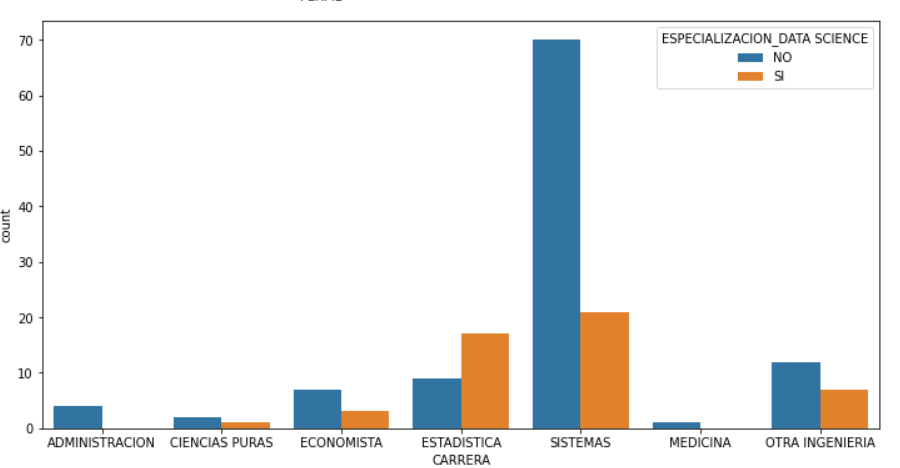
2. **LA INFLUENCIA DEL PERFIL EN UNA ESPECIALIZACIÓN DE DATA SCIENCE**

En la siguiente gráfica observamos que si influye, debido a que las personas mas jóvenes tienden a especializarse en el campo de DATA SCIENCE
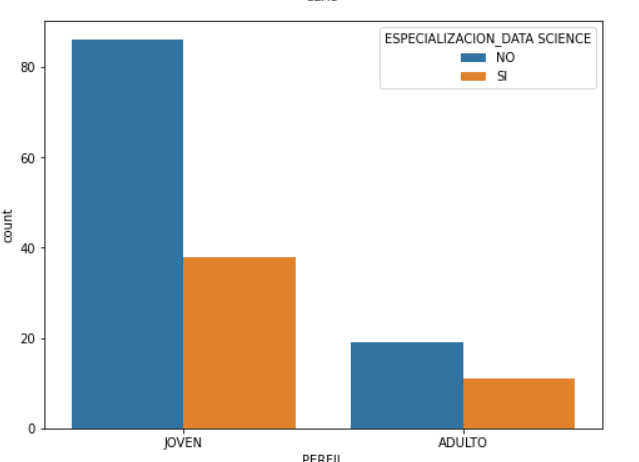
3. **LA INFLUENCIA DDEL SEXO EN UNA ESPECIALIZACIÓN DE DATA SCIENCE**

En la siguiente gráfica observamos que si influye, debido a que las personas de género másculino tienden a especializarse en el campo de DATA SCIENCE

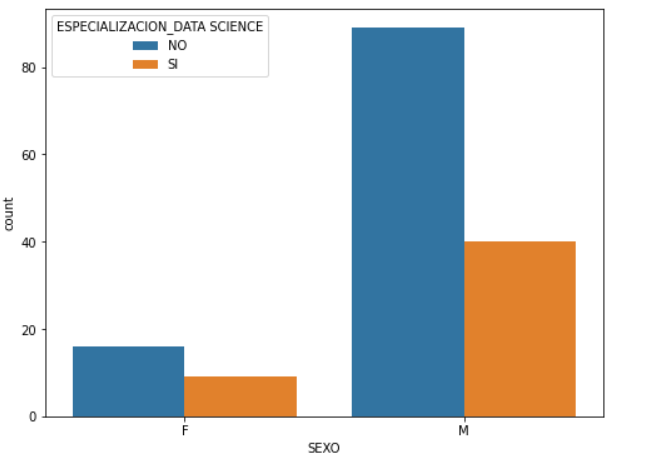